In [13]:
# Carregando bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
# Carregando o conjunto iris dataset do link oficial
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                       'machine-learning-databases/iris/iris.data',
                       header=None)

# Obtendo o conjunto de dados X e o vetor de alvos y
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0, 2]].values

# Adicionando a coluna do bias (nunca esqueça, nos nossos algoritmos 
#                               baseados em perceptron/gradiente é necessário incluir!)
X = np.c_[np.ones(X.shape[0]), X]

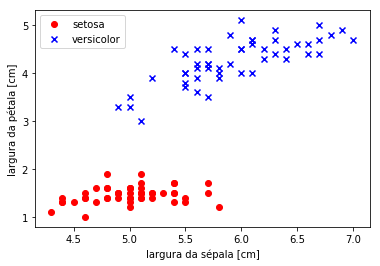

In [15]:
# Visualizando os dados (estamos pulando a coluna do bias)
plt.scatter(X[:50, 1], X[:50, 2],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 1], X[50:100, 2],
             color='blue', marker='x', label='versicolor')
plt.xlabel('largura da sépala [cm]')
plt.ylabel('largura da pétala [cm]')
plt.legend(loc='upper left')
plt.show()

In [16]:
from matplotlib.colors import ListedColormap

#
#  Função para plotar fronteiras de decisão
#
#  Extraída do livro: Python Machine Learning do autor Sebastian Raschka. 
#
#    Entradas : X_{m, n}      = uma matriz (ou vetor) de características
#               y_{m, 1}      = um vetor de alvos em \{-1,1\}
#               thetas_{n, 1} = um vetor de pesos
#               f             = função de predição
#               resolution    = resolução do gráfico (cuidado valores altos dão estouro de memória)
#
#    Observação: X deve estar com a coluna bias adicionada
#
def plot_decision_regions(X, y, thetas, f, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    x2_min, x2_max = X[:, 2].min() - 1, X[:, 2].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                              np.arange(x2_min, x2_max, resolution))

    Z = f(np.array([np.ones(xx1.ravel().shape[0]), xx1.ravel(), xx2.ravel()]).T, thetas)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 1],
                    y=X[y == cl, 2],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

In [17]:
#
#  Hipótese vetorizada do perceptron
#
#    Entradas : X_{m, n}      = uma matriz (ou vetor) de características
#               thetas_{n, 1} = um vetor de pesos
#
#
#    Saída : resultado da função degrau.
#
#    Observação: X deve estar com a coluna bias adicionada
#

def h(X, thetas):
    return np.where(X.dot(thetas) >= 0.0, 1, -1)

#
#  Algoritmo de aprendizagem supervisionada do perceptron (classificação binária)
#
#    Entradas : X_{m, n}      = uma matriz (ou vetor) de características
#               y_{m, 1}      = um vetor de alvos em \{-1,1\}
#               iterations    = número máximo de iterações do algoritmo
#               alpha         = taxa de aprendizagem, tipicamente um valor entre (0.0 e 1)
#
#
#    Saída : thetas = vetor de pesos aprendido pelo perceptron
#
#    Observação: X deve estar com a coluna bias adicionada
#

def perceptron(X, y, iterations, alpha):
    thetas = np.zeros(X.shape[1])
    for i in range(iterations):
        for xi, yi in zip(X, y):
            thetas = thetas + alpha * (yi - h(xi, thetas)) * xi
    
    return thetas

In [18]:
# Treinando nosso modelo...
iterations = 10 
alpha = 0.01
thetas = perceptron(X, y, iterations, alpha)

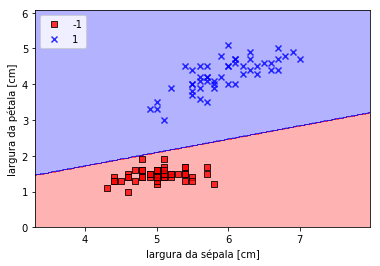

In [19]:
# Plotando a fronteira de decisão do Perceptron
plot_decision_regions(X, y, thetas, h)
plt.xlabel('largura da sépala [cm]')
plt.ylabel('largura da pétala [cm]')
plt.legend(loc='upper left')
plt.show()